<a href="https://colab.research.google.com/github/scottcohn97/schmelz_bowles/blob/main/schmelz_bowles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Schmelz + Bowles

In [ ]:
install.packages("tidyverse")
install.packages("latex2exp")
install.packages("ggtext")

In [ ]:
library(tidyverse)
library(latex2exp)
library(ggtext)

$$w = \beta_i + \alpha_i \frac{f^\mu}{f^\mu + (1 - f)^\mu},$$

where $i \in \{e, v\}, \; \beta_v > \beta_e, \; \alpha_v > \alpha_e, \; \mu > 1$.

In [3]:
# w, fraction wishing to be vaccinated at time t+1
w <- function(beta, alpha, f, mu) {
  beta + alpha * ((f^mu) / (f^mu + (1 - f)^mu))
} 

# init df
df <- tibble(
  # fraction vaccinated at time t
  f = seq(0, 1, 0.01)
)

## Panel 1

In [4]:
# Add columns
df01 <- df %>% 
  # Add vaccine adoption vals
  mutate(w_e = w(beta = 0.15, alpha = 0.7, f = f, mu = 1.9),
         w_v = w(beta = 0.2, alpha = 0.8, f = f, mu = 1.9)) %>% 
  # Force frac ceiling
  mutate(w_v = if_else(w_v > 1, 1, w_v)) %>%
  # Reshape for plot
  pivot_longer(!f, names_to = "w", values_to = "w_val")

Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”


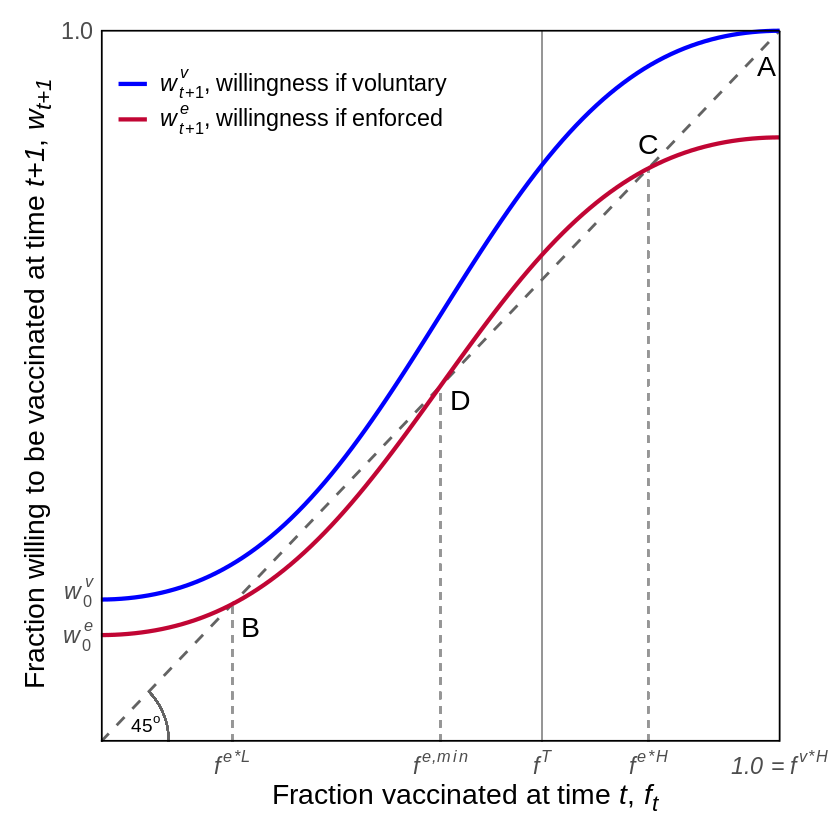

In [42]:
# Base plot
p1 <- df01 %>% ggplot(aes(x = f, y = w_val)) + 
  geom_segment(x = 0.1937, y = 0, xend = 0.1937, yend = 0.1937, color = "#969696", linetype = 2) +
  geom_segment(x = 0.5, y = 0, xend = 0.5, yend = 0.5, color = "#969696", linetype = 2)  +
  geom_segment(x = 0.65, y = 0, xend = 0.65, yend = 1, color = "#969696", linetype = 1)  +
  geom_segment(x = 0.8063, y = 0, xend = 0.8063, yend = 0.8063, color = "#969696", linetype = 2)  +
  geom_line(aes(y = f), linetype = 2, color = "#636363", size = 0.8) + 
  geom_line(aes(color = w), size = 1.2) +
  geom_curve(aes(x = .1, y = 0, xend = sqrt(2)/20, yend = sqrt(2)/20), data = df01, curvature = 0.2, color = "#636363")
  
# Add labels + Annotations
p2 <- p1 + 
  xlab("Fraction vaccinated at time *t*, *f*<sub>*t*</sub>") +
  ylab("Fraction willing to be vaccinated at time *t+1*, *w*<sub>*t+1*</sub>") +
  annotate("text", x = 0.065, y = 0.025, label = TeX("45^{o}"), size = 4) +
  annotate("text", x = .22, y = .16, label = "B", size = 6) +
  annotate("text", x = .98, y = .95, label = "A", size = 6) +
  annotate("text", x = 0.8063, y = 0.84, label = "C", size = 6) +
  annotate("text", x = 0.53, y = 0.48, label = "D", size = 6)

# Add theme elements
p3 <- p2 + 
  # remove buffer
  scale_x_continuous(limits = c(0,1.075), expand = c(0, 0),
    breaks = c(0.1937, 0.5, 0.65, 0.8063, 1),
    labels = c(expression(italic(f^{ paste(e,"*",L)})), 
               expression(italic(f^{ paste(e,",", min)})), 
               expression(italic(f^T)), 
               expression(italic(f^{ paste(e,"*",H)})), 
               expression(italic("1.0" == f^{ paste(v,"*",H)})))) +
  scale_y_continuous(limits = c(0,1.01), expand = c(0, 0),
    breaks = c(0.148, 0.21, 1), 
    labels = c(expression(italic(w[0]^e)), 
               expression(italic(w[0]^v)), 
               "1.0")) +
  # color
  scale_color_manual(name = element_blank(),
    values = c("#c10534", "#0000ff"),
    labels = c(bquote(italic(w[t+1]^e) * ", willingness if enforced"),
               bquote(italic(w[t+1]^v) * ", willingness if voluntary")),
               guide = guide_legend(reverse = TRUE)) + 
  # theme
  theme_minimal() + 
  theme(
    panel.grid = element_blank(),
    legend.position = c(0.25,0.9),
    legend.text = element_text(size = 14),
    legend.key.size = unit(0.75, "cm"),
    axis.title.x = ggtext::element_markdown(size = 17),
    axis.title.y = ggtext::element_markdown(size = 17),
    axis.text = element_text(size = 14),
    plot.margin = margin(.5, .2, .5, .5, "cm") 
    ) +
  annotate(geom = 'segment', y = 1, yend = 1, color = 'black', x = -Inf, xend = 1, size = 0.5) +
  annotate(geom = 'segment', y = 0, yend = 0, color = 'black', x = -Inf, xend = 1, size = 1) +
  annotate(geom = 'segment', y = 1, yend = 0, color = 'black', x = 1, xend = 1, size = 0.5) +
  annotate(geom = 'segment', y = 1, yend = 0, color = 'black', x = 0, xend = 0, size = 1) 

p3

In [47]:
# Save plot
ggsave(file = "schmelz_bowles_01.pdf", plot = p3, width = 7, height = 7)

Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”


## Panel 2

In [27]:
# Add columns
df2 <- df %>% 
  # Add vaccine adoption vals
  mutate(w_e = w(beta = 0.05, alpha = 0.7, f = f, mu = 1.9),
         w_v = w(beta = 0.1, alpha = 0.8, f = f, mu = 1.9)) %>% 
  # Force frac ceiling
  mutate(w_v = if_else(w_v > 1, 1, w_v)) %>%
  # Reshape for plot
  pivot_longer(!f, names_to = "w", values_to = "w_val")

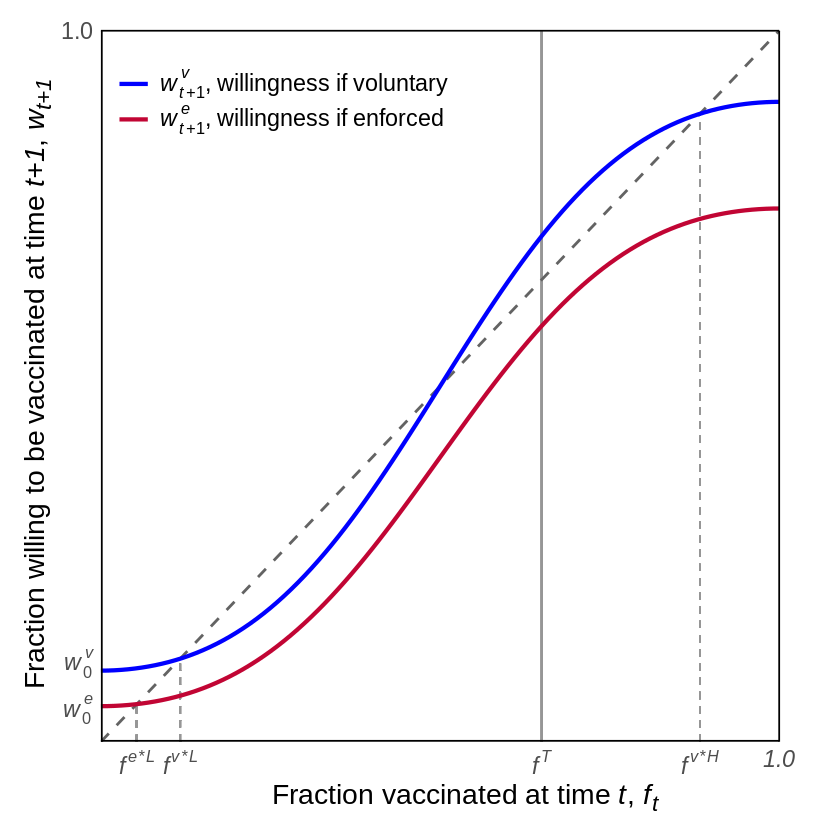

In [45]:
# Base plot
g1 <- df2 %>% ggplot(aes(x = f, y = w_val)) + 
  geom_segment(x = 0.0529, y = 0, xend = 0.0529, yend = 0.0529, color = "#969696", linetype = 2) +
  geom_segment(x = 0.1168, y = 0, xend = 0.1168, yend = 0.1168, color = "#969696", linetype = 2) +
  geom_segment(x = 0.65, y = 0, xend = 0.65, yend = 1.0, color = "#969696", linetype = 1) +
  geom_segment(x = 0.8832, y = 0, xend = 0.8832, yend = 0.8832, color = "#969696", linetype = 2) +
  geom_line(aes(y = f), linetype = 2, color = "#636363", size = 0.8) + 
  geom_line(aes(color = w), size = 1.2) 

# Add labels and annotation
g2 <- g1 + 
  xlab("Fraction vaccinated at time *t*, *f*<sub>*t*</sub>") +
  ylab("Fraction willing to be vaccinated at time *t+1*, *w*<sub>*t+1*</sub>") 

# Add theme elements
g3 <- g2 + 
  # remove buffer
  scale_x_continuous(limits = c(0,1.02), expand = c(0, 0),
    breaks = c(0.0529, 0.1168, 0.65, 0.8832, 1.0), 
    labels = c(expression(italic(f^{ paste(e,"*",L)})),
               expression(italic(f^{ paste(v,"*",L)})),
               expression(italic(f^T)),
               expression(italic(f^{ paste(v,"*",H)})), 
               expression(italic("1.0")))) +
  scale_y_continuous(limits = c(0,1.01), expand = c(0, 0),
    breaks = c(0.045, 0.11, 1), 
    labels = c(expression(italic(w[0]^e)), 
                expression(italic(w[0]^v)), 
               "1.0")) +
  # color
  scale_color_manual(name = element_blank(),
    values = c("#c10534", "#0000ff"),
    labels = c(bquote(italic(w[t+1]^e) * ", willingness if enforced"),
               bquote(italic(w[t+1]^v) * ", willingness if voluntary")),
               guide = guide_legend(reverse = TRUE)) + 
  # theme
  theme_minimal() + 
  theme(
    panel.grid = element_blank(),
    legend.position = c(0.265,0.9),
    legend.text = element_text(size = 14),
    legend.key.size = unit(0.75, "cm"),
    axis.title.x = ggtext::element_markdown(size = 17, hjust = 0.56),
    axis.title.y = ggtext::element_markdown(size = 17),
    axis.text = element_text(size = 14),
    plot.margin = margin(.5, 1, .5, .5, "cm")
    ) +
    annotate(geom = 'segment', y = 1, yend = 1, color = 'black', x = -Inf, xend = 1, size = 0.5) +
    annotate(geom = 'segment', y = 0, yend = 0, color = 'black', x = -Inf, xend = 1, size = 1) +
    annotate(geom = 'segment', y = 1, yend = 0, color = 'black', x = 1, xend = 1, size = 0.5) +
    annotate(geom = 'segment', y = 1, yend = 0, color = 'black', x = 0, xend = 0, size = 1) 

g3

In [46]:
# Save plot
ggsave(file = "schmelz_bowles_02.pdf", plot = g3, width = 7, height = 7)

In [46]:
# Session Info
sessionInfo()

R version 4.0.3 (2020-10-10)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.2.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] latex2exp_0.4.0 forcats_0.5.0   stringr_1.4.0   dplyr_1.0.3    
 [5] purrr_0.3.4     readr_1.4.0     tidyr_1.1.2     tibble_3.0.5   
 [9] ggplot2_3.3.3   tidyverse_1.3.0

loaded via a namespace (and not attached):
 [1] pbdZMQ_0.3-4      tidyselect_1.1.0  repr_1.1.0